In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#permer d'afficher les graphics en jupyter au lieu de les ouvrir dans une autre fenetre
%matplotlib inline
import numpy as np

In [11]:
#importer la dataset from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

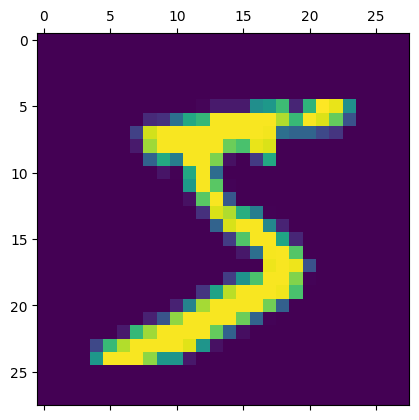

In [12]:
#afficher la première image dans X_train
plt.matshow(X_train[0])

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
#changer la taille des matrices de données à un vecteur de données de taille 28*28 puisque chaque image de taille 28*28
X_train_shaped = X_train.reshape(len(X_train), 28*28)
X_test_shaped = X_test.reshape(len(X_test), 28*28)

In [28]:
X_test_shaped.shape

(10000, 784)

In [29]:
X_train_shaped[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
#création d'un simple Neural Network avec two layers (input,output)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_shaped, y_train, epochs = 10)

C:\Users\Chouaib\ML\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8137 - loss: 0.7216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9155 - loss: 0.3066
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9196 - loss: 0.2866
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9262 - loss: 0.2702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9261 - loss: 0.2621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9289 - loss: 0.2580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9275 - loss: 0.2616
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9304 - loss: 0.2511
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9310 - loss: 0.2528
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9306 - loss: 0.2496


In [31]:
model.evaluate(X_test_shaped, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9145 - loss: 0.3017


[0.2655867040157318, 0.9258999824523926]

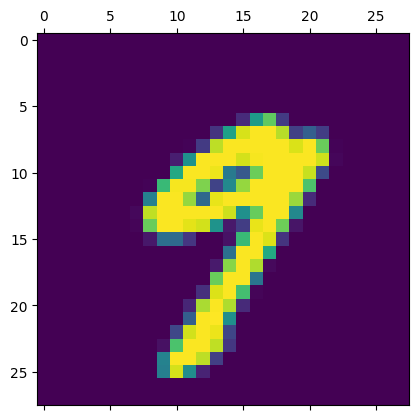

In [42]:
plt.matshow(X_test[20])

In [38]:
y_pred = model.predict(X_test_shaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
#10 output neurons on doit voir lequelle est grand dans y_pred[0] pour voir le nombre que notre model predicted
y_pred[20]

array([1.9688143e-04, 1.7974258e-05, 4.9909422e-06, 3.2933253e-01,
       7.1519828e-01, 4.0224507e-02, 6.7386718e-09, 9.6716297e-01,
       1.2181395e-01, 9.9235594e-01], dtype=float32)

In [44]:
np.argmax(y_pred[20])

np.int64(9)

In [47]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [54]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

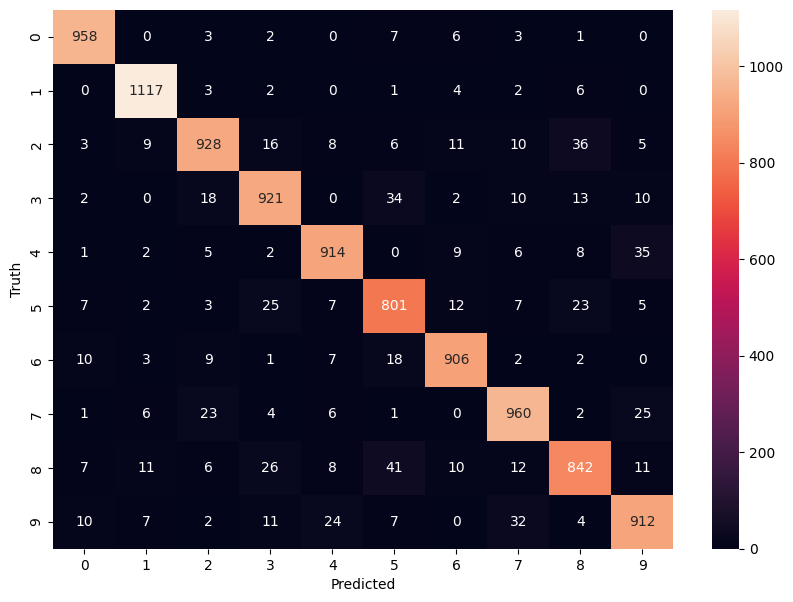

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
#création d'un simple Neural Network avec three layers (input,hidden,output)
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8759 - loss: 0.4425
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9598 - loss: 0.1369
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0496
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9896 - loss: 0.0330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0242
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9952 - loss: 0.0183
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0167


In [71]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0961


[0.0842389464378357, 0.975600004196167]

In [73]:
y_pred2 = model2.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
np.argmax(y_pred2[20])

np.int64(9)

In [75]:
y_pred_labels2 = [np.argmax(i) for i in y_pred2]
y_pred_labels2[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [76]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels2)

Text(95.72222222222221, 0.5, 'Truth')

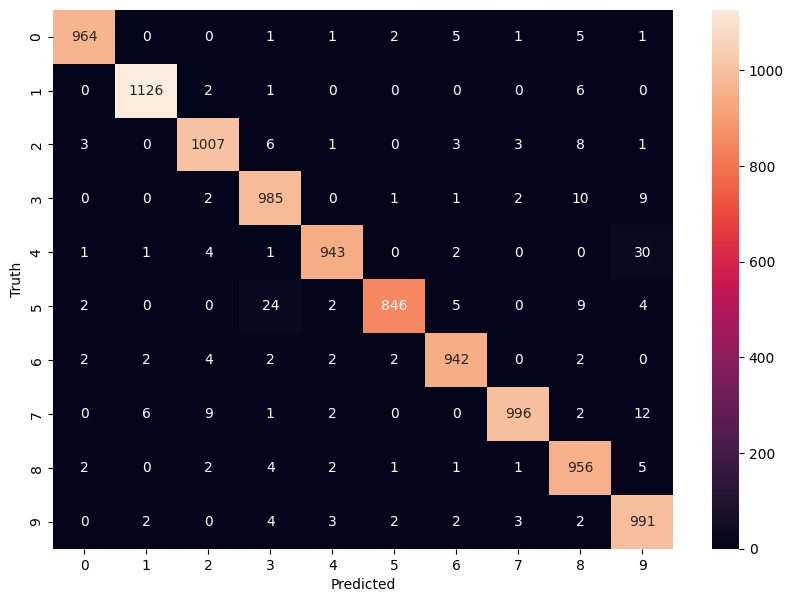

In [77]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
model2.save("Classification_chiffres_manuscrits.keras")